In [1]:
from helpers import *

In [2]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

<AxesSubplot:xlabel='x', ylabel='y'>

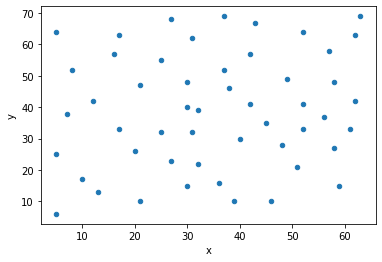

In [3]:
df.plot.scatter("x", "y")

In [15]:
sim = AnnealTVS(df, K = 2, stopK = 0.0001, alpha = 0.99)

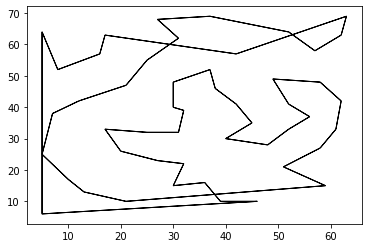

In [16]:
sim.plot_solution()

In [21]:
ans = sim.sim_anneal()

times lowered: 0
times raised:0


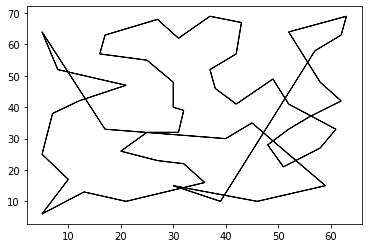

In [14]:
sim.plot_solution()

In [8]:
sim.total_distance()

557.3631399584586